---
# Les Arbres Binaires de Recherche (ABR)

## Définition

Un arbre binaire de recherche est un arbre binaire dont les **valeurs des noeuds** (valeurs qu'on appelle étiquettes, ou clés) vérifient la propriété suivante :

- L'étiquette d'un noeud est supérieure ou égale à celle de chaque noeud de son sous-arbre gauche.
- L'étiquette d'un noeud est strictement inférieure à celle du chaque noeud de son sous-arbre droit.

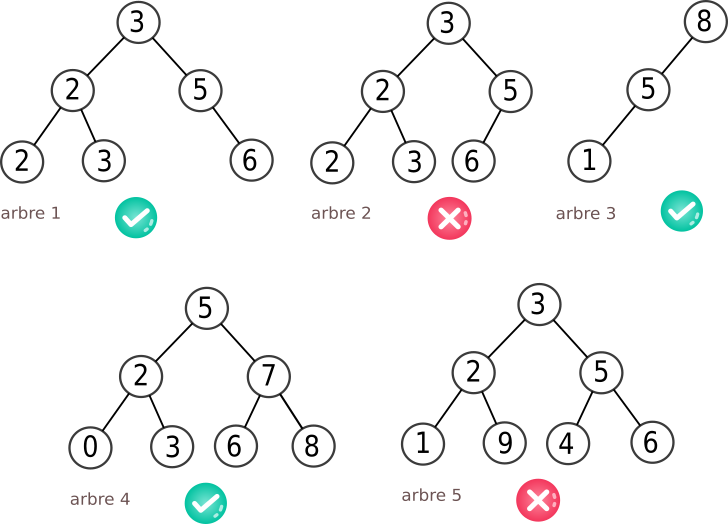



À noter que l'arbre 3 (qui est bien un ABR) est appelé arbre **filiforme**.

L'arbre 5 n'est pas un ABR à cause de la feuille 9, qui fait partie du sous-arbre gauche de 3 sans lui être inférieure.

Remarque : on pourrait aussi définir un ABR comme un arbre **dont le parcours infixe est une suite croissante**.

## Déterminer si un arbre est un ABR

Employer une méthode récursive imposerait de garder en mémoire dans l'exploration des sous-arbres la valeur maximale ou minimale. Nous allons plutôt utiliser la remarque précédente :
> #### Si le parcours infixe d'un arbre binaire renvoie une liste d'éléments triés, alors celui-ci est un Arbre Binaire de Recherche.

---
## 💻 EXERCICE 1
> - Représentez les arbres 4 et 5 ci-dessus nommés `a4` et `a5`  à l'aide de notre classe `Arbre`

In [ ]:
class Arbre:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def __repr__(self):
        chaine= "(" + str(self.data) + ", "
        if self.left == None:
            chaine = chaine + "∆, "
        else:
            chaine = chaine + self.left.__repr__() + ', '
        if self.right == None:
            chaine = chaine + "∆)"
        else:
            chaine = chaine + self.right.__repr__() + ")"

        return chaine 
    
# à completer


In [ ]:
# Vérification
print(a4) # doit renvoyer (5, (2, (0, ∆, ∆), (3, ∆, ∆)), (7, (6, ∆, ∆), (8, ∆, ∆)))
print(a5) # doit renvoyer (3, (2, (1, ∆, ∆), (9, ∆, ∆)), (5, (4, ∆, ∆), (6, ∆, ∆)))

> - Reprenez maintenant votre algorithme du parcours infixe vu précédemment (_Exercice 6_) et modifiez-le pour que celui-ci retourne une liste contenant les valeurs des étiquettes au lieu d'un `print`  
> 💡 _Si l'arbre est `None` renvoyez une liste vide, sinon construisez une nouvelle liste complétée récursivement_  

In [ ]:
# à completer


In [ ]:
# Vérification
print(list_infixe(a4)) # doit renvoyer [0, 2, 3, 5, 6, 7, 8]
print(list_infixe(a5)) #doit renvoyer [1, 2, 9, 3, 4, 5, 6]

> - Utilisez maintenant ce parcours  pour implémenter la fonction `est_ABR` qui renverra `True` si l'abre passé en paramètre est un arbre binaire de recherche et `False`sinon.  
> 
> 💡 _La fonction `sorted(l)` renverra une liste contenant les éléments de la liste `l` passée en paramètre triés._  

In [ ]:
# à completer


In [ ]:
# Vérification
print(est_ABR(a4))  #  doit renvoyer True
print(est_ABR(a5))  #  doit renvoyer False

## Rechercher une clé dans un ABR

- Un arbre binaire de taille $n$ contient $n$ clés (pas forcément différentes). Pour savoir si une valeur particulière fait partie des clés, on peut parcourir tous les noeuds de l'arbre, jusqu'à trouver (ou pas) cette valeur dans l'arbre. Dans le pire des cas, il faut donc faire  $n$ comparaisons.
- Mais si l'arbre est un ABR, le fait que les valeurs soient «rangées» va considérablement améliorer la vitesse de recherche de cette clé, puisque la moitié de l'arbre restant sera écartée après chaque comparaison.
- Le code suivant permet de rechercher une valeur dans un ABR et de renvoyer `True`si la valeur est trouvée et `False` sinon.

💡 _Vous noterez que cet algorithme combine la **récursivité** et la construction **dichotomique** de l'ABR_

In [ ]:
# à exécuter
def contient(a, v):
    if a is None :
        return False
    if a.data == v :
        return True
    if v < a.data :
        return contient(a.left, v)
    else:
        return contient(a.right, v)

- Vérifions sur nos arbres 4 et 5 : 
    - L'arbre 4 contient la valeur **8**
    - L'arbre 5 ne contient pas la valeur **8**

In [ ]:
# Vérification
print(contient(a4, 8))
print(contient(a5, 8))

## Coût de la recherche dans un ABR équilibré

⚠️ **Définition :** Un arbre équilibré est un arbre qui maintient une profondeur équilibrée (à +/- 1) entre ses branches. 
L'arbre ci-dessous n'est pas équilibré :
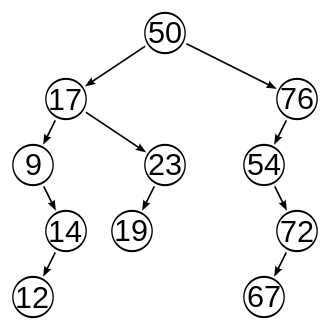

Celui-ci est équilibré :
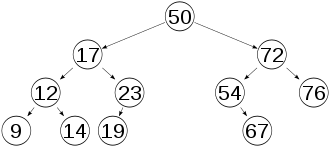


⚠️ **Définition :** Un arbre binaire complet est un arbre dont tous les noeuds internes ont deux fils.
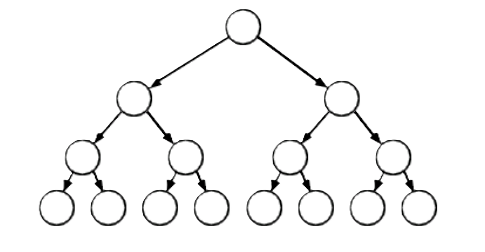



Imaginons un arbre équilibré de taille $n$. Combien d'étapes faudra-t-il, dans le pire des cas, pour trouver (ou pas) une clé particulière dans cet arbre ?  

Après chaque noeud, le nombre de noeuds restant à explorer est divisé par 2. On retrouve là le principe de recherche dichotomique, vu en classe de Première et revue en début d'année de Terminale.  

S'il faut parcourir tous les étages de l'arbre avant de trouver (ou pas) la clé recherchée, le nombre de noeuds parcourus est donc égal à la hauteur de l'arbre.  

Pour un arbre complet, cette hauteur vérifie la relation $n = 2^h -1$ et donc $2^h = n - 1$.  
$h$ est donc le «nombre de puissance de 2» que l'on peut mettre dans $n+1$. Cette notion s'appelle le **logarithme de base 2** et se note $log_{2}$. Par exemple, $log_{2}(64) = 6 $ car $2^6 = 64$  

Le nombre maximal de noeuds à parcourir pour rechercher une clé dans un ABR équilibré de taille $n$ est donc de l'ordre de $log_{2}(n)$ ce qui est très performant. Par exemple pour arbre contenant 1000 valeurs, 10 étapes suffisent.  

Cette **complexité logarithmique** est un atout essentiel de la structure d'arbre binaire de recherche.
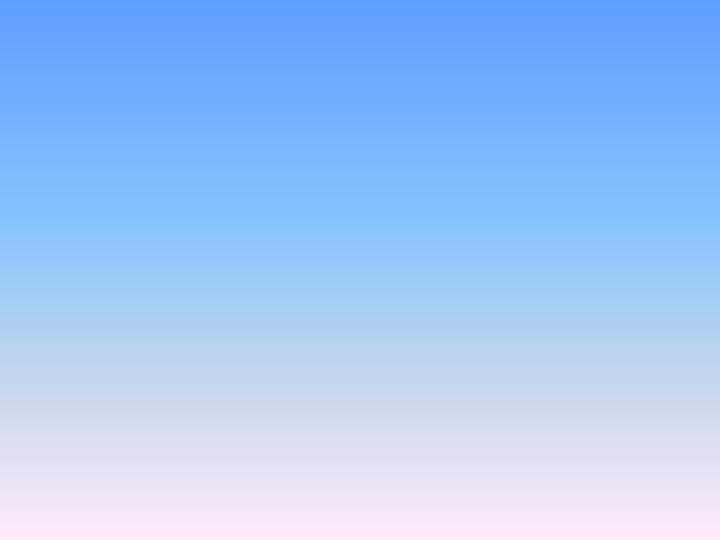
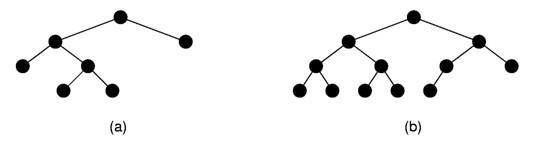


## Insertion dans un ABR

L'insertion d'une clé dans un arbre va se faire au niveau d'une feuille, donc en bas de l'arbre. Dans la version récursive de l'algorithme d'insertion, que nous allons implémenter, il n'est pourtant pas nécessaire de descendre manuellement dans l'arbre jusqu'au bon endroit : il suffit de distinguer dans lequel des deux sous-arbres gauche et droit doit se trouver la future clé, et d'appeler récursivement la fonction d'insertion dans le sous-arbre en question.

Algorithme :
- Si l'arbre est vide, on renvoie un nouvel objet Arbre contenant la clé.
- Sinon, on compare la clé à la valeur du noeud sur lequel on est positionné :
    - Si la clé est inférieure à cette valeur, on va modifier le sous-arbre gauche en le faisant pointer vers ce même sous-arbre une fois que la clé y aura été injectée, par un appel récursif.
    - Si la clé est supérieure, on fait la même chose avec l'arbre de droite.
on renvoie le nouvel arbre ainsi créé.

---
## 💻 EXERCICE 2
> - Nous allons insérer la clé 4 dans l'arbre `a4` créé précédemment.
> 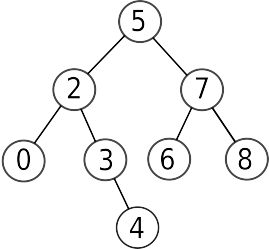
> - Affichez à nouveau le parcours infixe de l'arbre

In [ ]:
# Vérification
print(list_infixe(a4)) # doit renvoyer [0, 2, 3, 5, 6, 7, 8]

> - Créez la fonction `insertion` qui prendra en paramètres un arbre binaire de recherche et une clé et qui inserera la clé au bon endroit dans l'arbre.
> - Insérez la valeur **4** dans l'arbre `a4`


In [ ]:
# à completer


In [ ]:
# Vérification
insertion(a4,4)

> - Affichez à nouveau le parcours infixe de l'arbre

In [ ]:
# Vérification
print(list_infixe(a4)) # doit renvoyer [0, 2, 3, 4, 5, 6, 7, 8]

---
## 💻 EXERCICE 3
> - Ecrivez une fonction `minimum` qui renvoie le plus petit élément d'un Arbre Binaire de Recherche  
>
> 💡 _Le plus petit élément est forcément la feuille la plus à gauche de l'ABR_

In [ ]:
# à completer


In [ ]:
# Vérification
minimum(a4) # doit renvoyer 0

---
## 💻 EXERCICE 4
> - Ecrivez une fonction `maximum` qui renvoie le plus grand élément d'un Arbre Binaire de Recherche  
>
> 💡 _Le plus grand élément est forcément la feuille la plus à droite de l'ABR_

In [ ]:
# à completer


In [ ]:
# Vérification
maximum(a4) #doit renvoyer 8